In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.impute import SimpleImputer  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix, classification_report  


 # Load the Dataset

In [265]:
import pandas as pd  

# Load the dataset  
data = pd.read_csv("Customer churn Data.csv")

 # Inspect the Data

In [267]:
# Check the shape of the dataset  
print(data.shape)  # Outputs number of rows and columns  



(11260, 19)


In [268]:
# Display the first few rows of the dataset  
data.head()  # Shows the first five rows of the DataFrame  



,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [269]:
# Summary statistics for numerical features  
data.describe()  # Provides mean, median, min, max, quartiles for numerical variables  



,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [270]:
# Overview of the DataFrame, including data types and missing values  
data.info() # Displays details about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

# Check for Missing Values

In [272]:
# Check for missing values  
data.isnull().sum()  # Sum of missing values for each column  


AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [273]:
# Convert to numeric and handle missing values for numerical columns  
numerical_cols = ['Tenure', 'CC_Contacted_LY', 'Service_Score',   
                  'Account_user_count', 'CC_Agent_Score',   
                  'rev_per_month', 'Complain_ly',   
                  'Day_Since_CC_connect', 'cashback']  

for col in numerical_cols:  
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric  
    data[col].fillna(data[col].median(), inplace=True)  # Impute with median  

# Impute categorical columns with the mode  
categorical_cols = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']  
for col in categorical_cols:  
    data[col].fillna(data[col].mode()[0], inplace=True)  # Impute with mode  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\3252981686.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)  # Impute with median
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\3252981686.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

# Check Data Types:

In [275]:
print(data.dtypes)  # Check data types

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object


### Correct Data Types:

In [277]:
# Example of converting a column to integer type  
data['Tenure'] = data['Tenure'].astype(int)  # If appropriate

# Remove or Handle Outliers

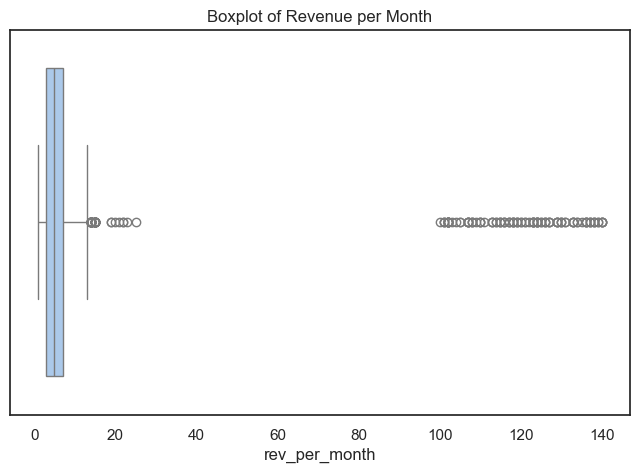

In [279]:
plt.figure(figsize=(8, 5))  
sns.boxplot(x=data['rev_per_month'])  
plt.title('Boxplot of Revenue per Month')  
plt.show()

### Check and Convert Categorical Variables:

In [281]:
categorical_vars = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']  
for var in categorical_vars:  
    data[var] = data[var].astype('category')

#### Address Outliers in rev_per_month:

In [283]:
# Calculate Q1, Q3, and IQR  
Q1 = data['rev_per_month'].quantile(0.25)  
Q3 = data['rev_per_month'].quantile(0.75)  
IQR = Q3 - Q1  

# Define thresholds  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

# Filter out outliers  
outliers = data[(data['rev_per_month'] < lower_bound) | (data['rev_per_month'] > upper_bound)]  
print(f"Outliers detected: {len(outliers)}")

Outliers detected: 185


# Exploratory Data Analysis (EDA):

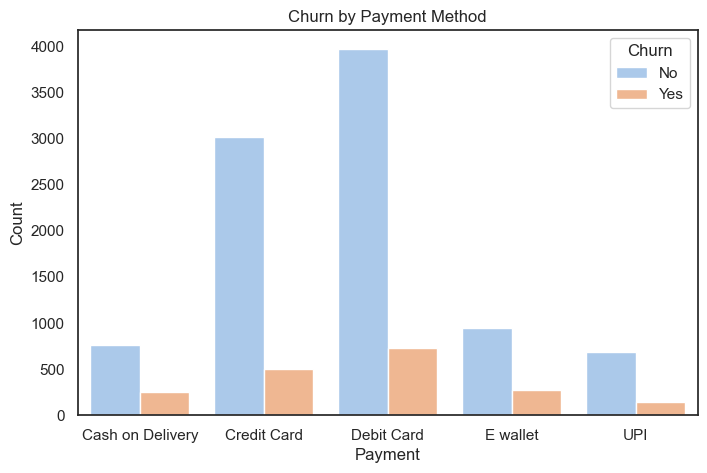

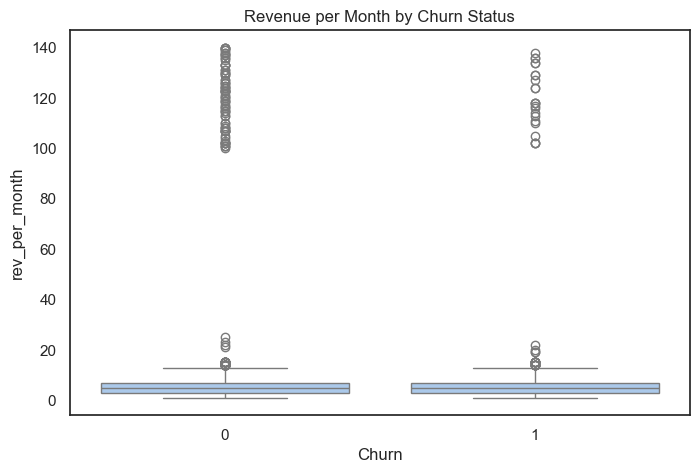

In [285]:
# Example of a count plot with respect to churn  
plt.figure(figsize=(8, 5))  
sns.countplot(x='Payment', hue='Churn', data=data)  
plt.title('Churn by Payment Method')  
plt.ylabel('Count')  
plt.legend(title='Churn', labels=['No', 'Yes'])  
plt.show()  

# Revenue per month by churn status  
plt.figure(figsize=(8, 5))  
sns.boxplot(x='Churn', y='rev_per_month', data=data)  
plt.title('Revenue per Month by Churn Status')  
plt.show()

## Pie Chart for Churn Distribution

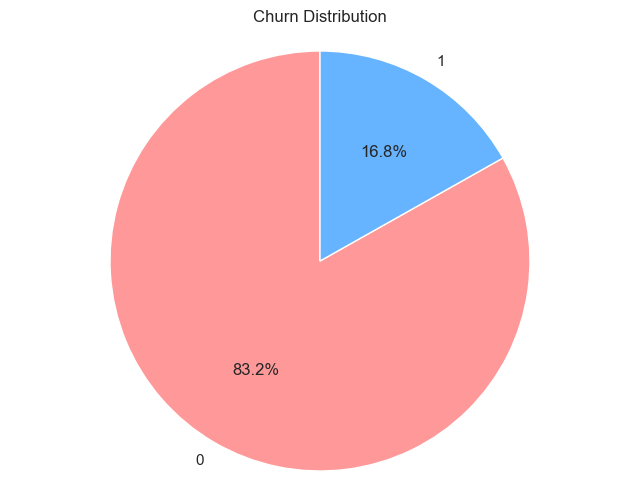

In [287]:
# Assuming you have a column 'Churn' in your data indicating whether a customer has churned (1) or not (0)  
churn_counts = data['Churn'].value_counts()  

plt.figure(figsize=(8, 6))  
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])  
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular  
plt.title('Churn Distribution')  
plt.show()

## Stacked Bar Plot for Categorical Features and Churn

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\317169071.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_payment = data.groupby(['Payment', 'Churn']).size().unstack().fillna(0)


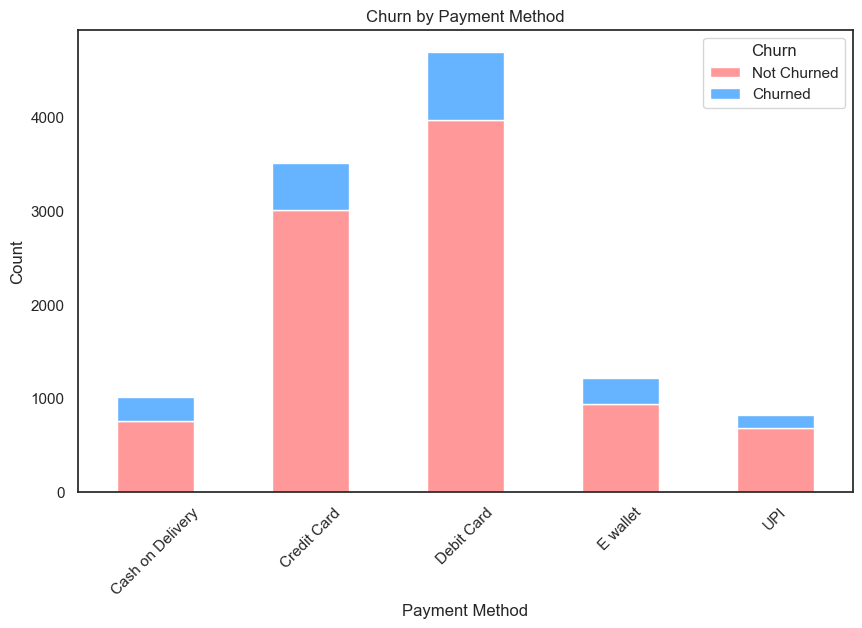

In [289]:
# Stacked bar plot for churn by a categorical feature (e.g., Payment method)  
churn_payment = data.groupby(['Payment', 'Churn']).size().unstack().fillna(0)  

churn_payment.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])  
plt.title('Churn by Payment Method')  
plt.xlabel('Payment Method')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])  
plt.show()

## Bar Plot for Churn Rate by Marital Status

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\1862013772.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_marital_status = data.groupby('Marital_Status')['Churn'].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\1862013772.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='Churn', data=churn_by_marital_status, palette='viridis')


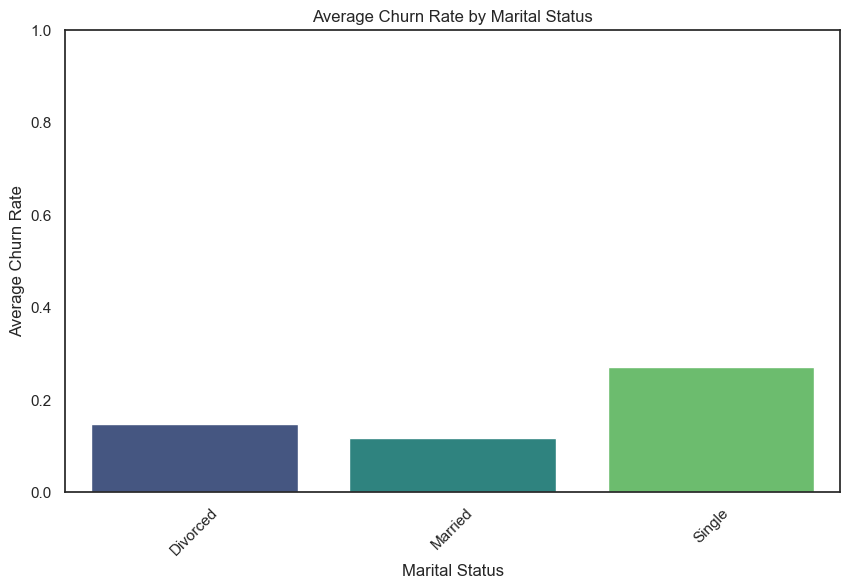

In [291]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np  

# Assuming you have a 'Marital_Status' column and a 'Churn' column  
churn_by_marital_status = data.groupby('Marital_Status')['Churn'].mean().reset_index()  

# Plotting  
plt.figure(figsize=(10, 6))  
sns.barplot(x='Marital_Status', y='Churn', data=churn_by_marital_status, palette='viridis')  
plt.title('Average Churn Rate by Marital Status')  
plt.xlabel('Marital Status')  
plt.ylabel('Average Churn Rate')  
plt.ylim(0, 1)  # Assuming Churn is binary (0 or 1)  
plt.xticks(rotation=45)  # Rotate labels for better readability  
plt.show()

## Pie Chart: Marital Status Distribution

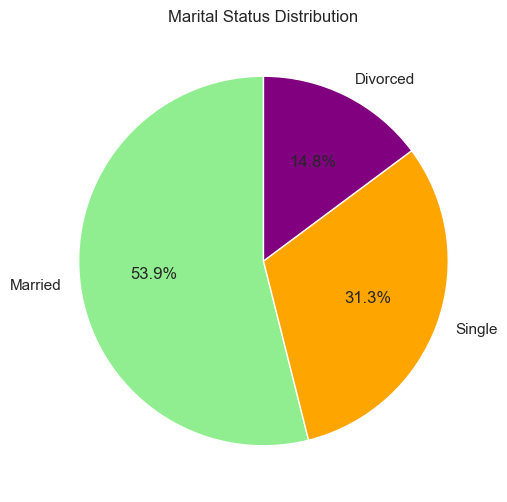

In [293]:
plt.figure(figsize=(8, 6))
data['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange', 'purple'])
plt.title("Marital Status Distribution")
plt.ylabel("")
plt.show()



## Summary Statistics

In [295]:
data.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11260.000000,11148.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,25629.50000,0.168384,10.985879,1.653929,17.850178,2.903375,3.704973,3.065808,6.266874,0.276288,4.581261,194.923268
std,3250.62635,0.374223,12.757534,0.915015,8.814851,0.722476,1.004383,1.372663,11.488990,0.447181,3.649643,174.976094
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,2.000000,148.000000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,3.000000,165.000000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,7.000000,197.000000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,47.000000,1997.000000


## Univariate Analysis

#### Numerical Variables

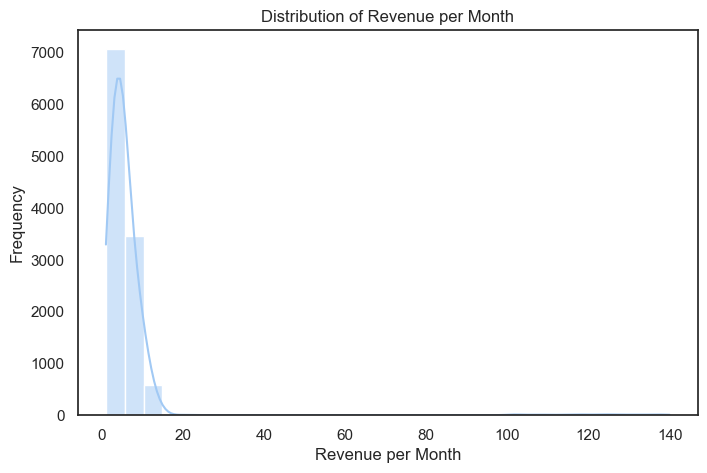

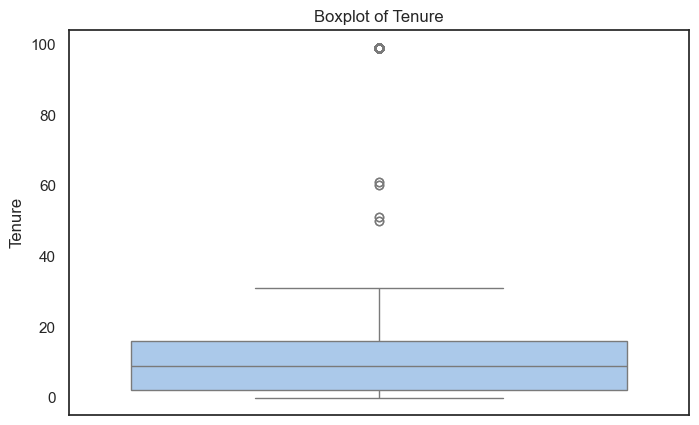

In [298]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Histogram for 'rev_per_month'  
plt.figure(figsize=(8, 5))  
sns.histplot(data['rev_per_month'], bins=30, kde=True)  
plt.title('Distribution of Revenue per Month')  
plt.xlabel('Revenue per Month')  
plt.ylabel('Frequency')  
plt.show()  

# Box plot for numerical variable  
plt.figure(figsize=(8, 5))  
sns.boxplot(y=data['Tenure'])  
plt.title('Boxplot of Tenure')  
plt.ylabel('Tenure')  
plt.show()

#### Categorical Variables:

#### Using count plots to visualize frequency distribution.

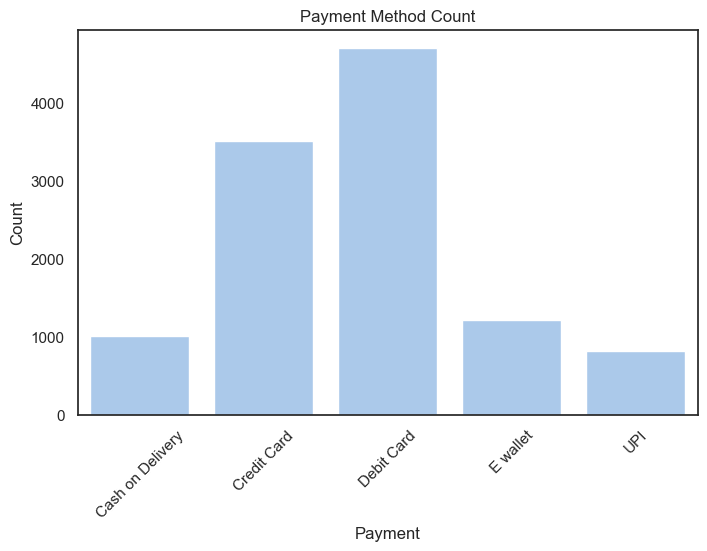

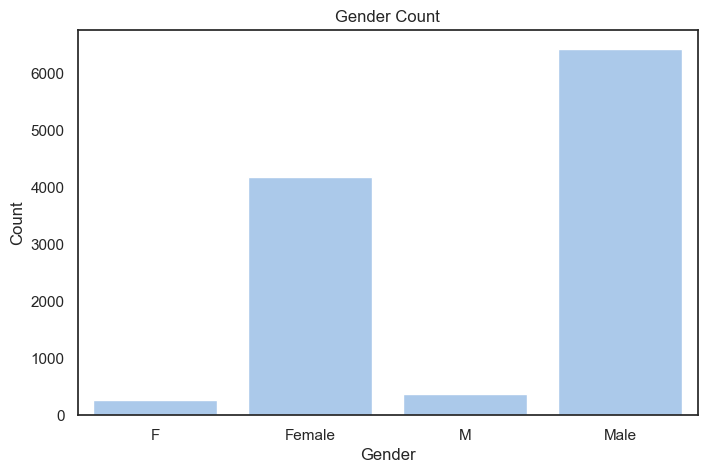

In [300]:
# Count plot for 'Payment'  
plt.figure(figsize=(8, 5))  
sns.countplot(x='Payment', data=data)  
plt.title('Payment Method Count')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.show()  

# Count plot for 'Gender'  
plt.figure(figsize=(8, 5))  
sns.countplot(x='Gender', data=data)  
plt.title('Gender Count')  
plt.ylabel('Count')  
plt.show()

## Bivariate Analysis

### Categorical vs. Categorical:

#### Using count plots or stacked bar plots to visualize relationships between categorical variables.

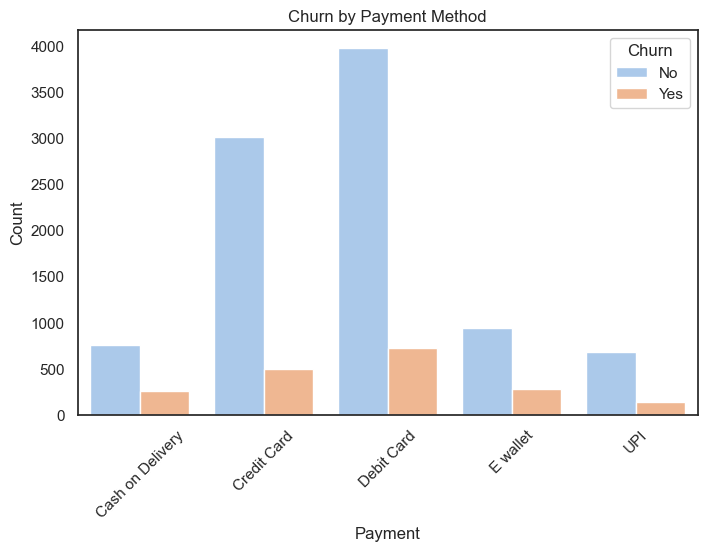

In [304]:
# Count plot of 'Payment' by 'Churn'  
plt.figure(figsize=(8, 5))  
sns.countplot(x='Payment', hue='Churn', data=data)  
plt.title('Churn by Payment Method')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.legend(title='Churn', labels=['No', 'Yes'])  
plt.show()

#### Numerical vs. Categorical:

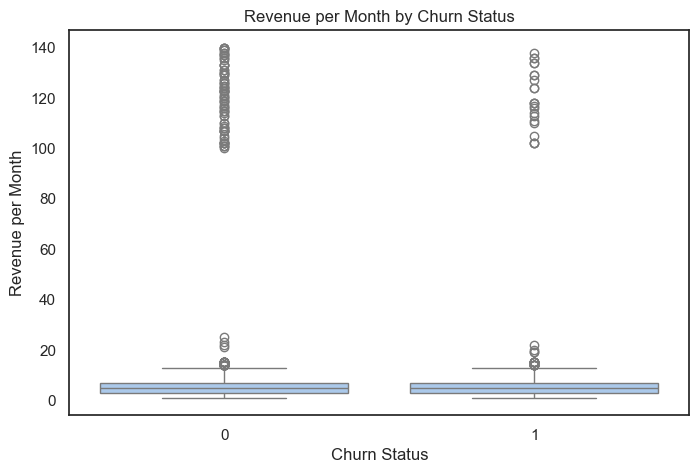

In [306]:
# Box plot of 'rev_per_month' by 'Churn'  
plt.figure(figsize=(8, 5))  
sns.boxplot(x='Churn', y='rev_per_month', data=data)  
plt.title('Revenue per Month by Churn Status')  
plt.xlabel('Churn Status')  
plt.ylabel('Revenue per Month')  
plt.show()

#### Numerical vs. Numerical:

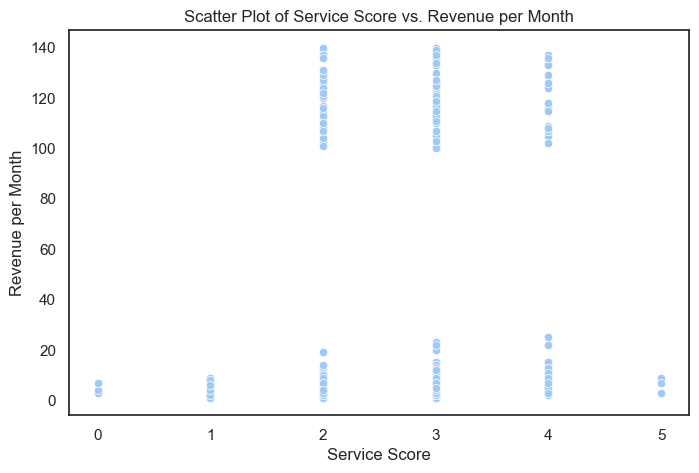

In [308]:
# Scatter plot for 'rev_per_month' and 'Service_Score'  
plt.figure(figsize=(8, 5))  
sns.scatterplot(x='Service_Score', y='rev_per_month', data=data)  
plt.title('Scatter Plot of Service Score vs. Revenue per Month')  
plt.xlabel('Service Score')  
plt.ylabel('Revenue per Month')  
plt.show()  



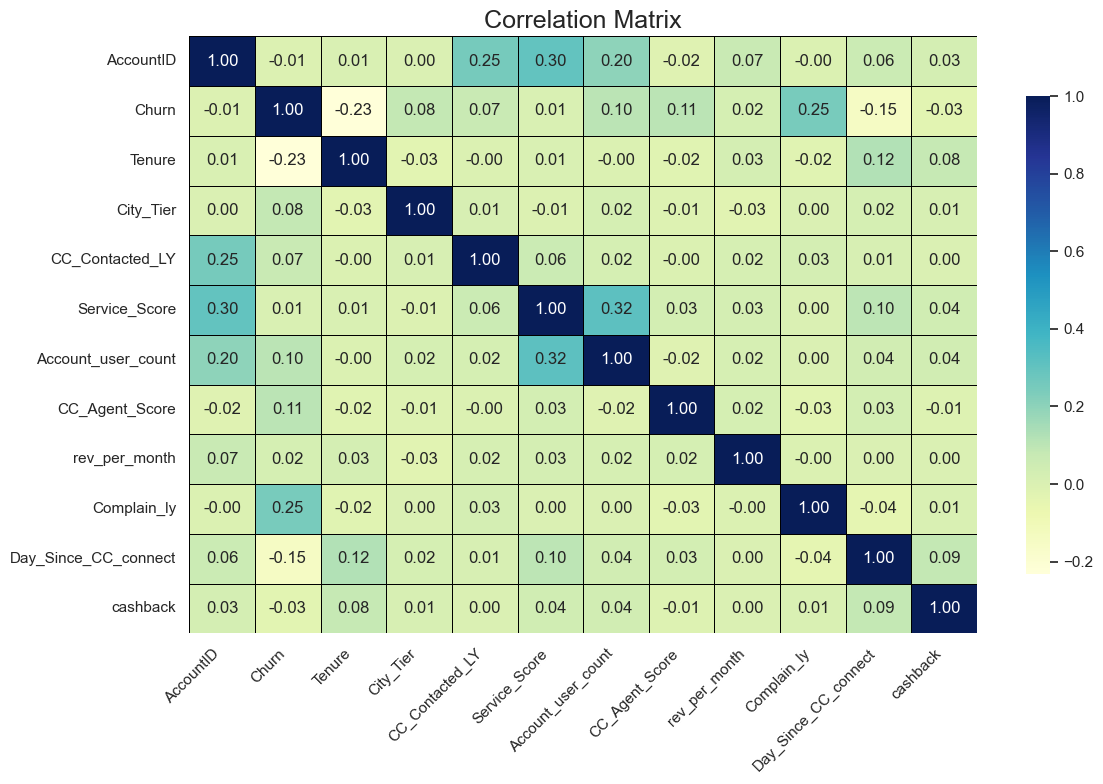

In [309]:
 # Select only numerical columns  
numerical_data = data.select_dtypes(include=[np.number])  

# SCompute the correlation matrix  
correlation_matrix = numerical_data.corr()  

#  the figure size and style  
plt.figure(figsize=(12, 8))  
sns.set(style='white', palette='pastel')  # Set background style  

# Creating the heatmap with an improved palette and better formatting  
heatmap = sns.heatmap(  
    correlation_matrix,  
    annot=True,  
    cmap='YlGnBu',  # Try using YlGnBu or another color palette  
    fmt=".2f",  # Format for numbers displayed in the heatmap  
    linewidths=0.5,  # Increase space between cells  
    linecolor='black',  # Color of cell lines  
    cbar_kws={"shrink": .8}  # Color bar adjustments  
)  

# Improved aesthetics  
plt.title('Correlation Matrix', fontsize=18)  
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility  
plt.yticks(rotation=0)  # Keep y labels horizontal  
plt.tight_layout()  # To adjust the layout  
plt.show()

# Preparing Data for Modeling
### Data Preprocessing
* Handle Missing Values: Decide on a strategy for any missing values.* 
Feature Encoding: Convert categorical variables into numerical representations using one-hot encoding or label encoding
* Feature Scaling: Standardize or normalize numerical features, especially critical for clustering algorithms like K-means.s.

In [311]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  

# Identify categorical and numerical features  
X = data.drop(columns=['Churn'])  
y = data['Churn']  

# Categorical and numerical feature lists  
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()  
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()  

# Preprocessing steps  
numerical_transformer = StandardScaler()  
categorical_transformer = OneHotEncoder(drop='first')  

preprocessor = ColumnTransformer(  
    transformers=[  
        ('num', numerical_transformer, numerical_features),  
        ('cat', categorical_transformer, categorical_features)  
    ])  

# Split the data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Predictive Models
### Choosing few machine learning models and evaluate their performances.

#### * Logistic Regression: Simple and interpretable for binary classification.
#### * Random Forest or Gradient Boosting: More complex, typically yield better performance on structured data.
#### * Support Vector Machines (SVM): Works well for classification tasks.

In [314]:
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.impute import SimpleImputer  

# Define preprocessing for both numerical and categorical features  
numerical_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values  
    ('scaler', StandardScaler())])  # Scale after imputation  

categorical_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(drop='first'))])  

# Combined preprocessing using ColumnTransformer  
preprocessor = ColumnTransformer(  
    transformers=[  
        ('num', numerical_transformer, numerical_features),  
        ('cat', categorical_transformer, categorical_features)  
    ])  

# Fit the model using the complete pipeline  
pipeline = Pipeline(steps=[('preprocessor', preprocessor),  
                            ('classifier', RandomForestClassifier(random_state=42))])  

# Now split the data and fit the pipeline  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AccountID', 'Tenure',
                                                   'City_Tier',
                                                   'CC_Contacted_LY',
                                                   'Service_Score',
                                                   'Account_user_count',
                                                   'CC_Agent_Score',
                                                   'rev_per_month',
                                                   'Complain_ly',
                                                   'Day_Since_CC_connect',
                                                   'cashback']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Payment', 'Gender',
                                                   'account_segment',
                                                   'Marital_Status',
                                                   'rev_growth_yoy',
                                                   'coupon_used_for_payment',
                                                   'Login_device'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Train  Predictive Model
##### I can now fit my model and evaluate its performance.

In [316]:
# Train the model  
pipeline.fit(X_train, y_train)  

# Make predictions  
y_pred = pipeline.predict(X_test)  

# Evaluate the model using confusion matrix and classification report  
from sklearn.metrics import confusion_matrix, classification_report  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[1846   10]
 [  84  312]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1856
           1       0.97      0.79      0.87       396

    accuracy                           0.96      2252
   macro avg       0.96      0.89      0.92      2252
weighted avg       0.96      0.96      0.96      2252



## Hyperparameter Tuning
##### To improve model's performance, I can fine-tune hyperparameters using techniques like Grid Search or Random Search.

In [318]:
from sklearn.model_selection import GridSearchCV  

# Define a parameter grid  
param_grid = {  
    'classifier__n_estimators': [100, 200],  
    'classifier__max_depth': [None, 10, 20],  
    'classifier__min_samples_split': [2, 5]  
}  

# Create GridSearchCV  
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  

# Fit Grid Search  
grid_search.fit(X_train, y_train)  

# Best parameters and model evaluation  
print(f"Best parameters: {grid_search.best_params_}")  
best_model = grid_search.best_estimator_  
y_pred_best = best_model.predict(X_test)  
print(confusion_matrix(y_test, y_pred_best))  
print(classification_report(y_test, y_pred_best))

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
[[1846   10]
 [  84  312]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1856
           1       0.97      0.79      0.87       396

    accuracy                           0.96      2252
   macro avg       0.96      0.89      0.92      2252
weighted avg       0.96      0.96      0.96      2252



# Clustering Analysis

## Prepare Data and Determine Optimal Clusters

#### Select relevant features and scale them appropriately.

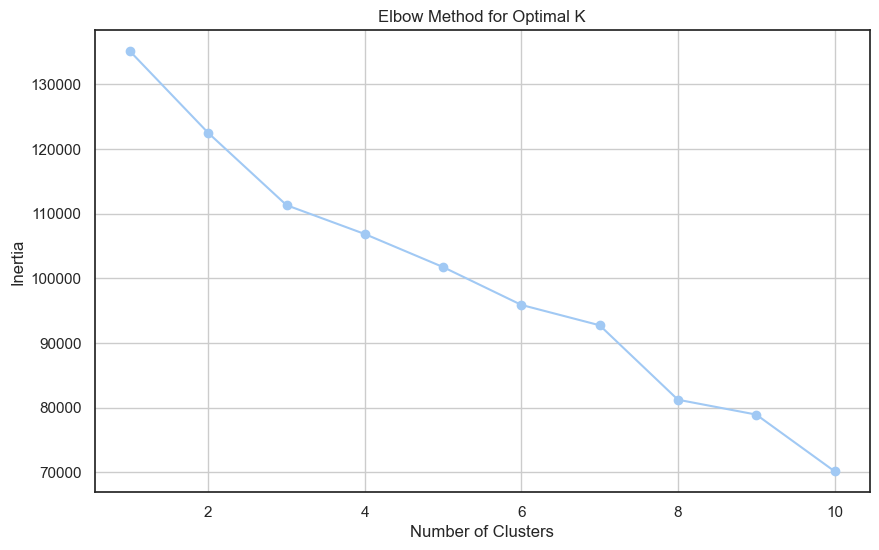

In [322]:
# Step 1: Prepare Data and Determine Optimal Clusters  

# Import necessary libraries  
import pandas as pd  
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  
from sklearn.impute import SimpleImputer  

# Assuming you have your data in a DataFrame called `data`  
# Define numerical features based on your specific dataset  
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()  # Replace if needed  

# Select numerical features for clustering  
clustering_data = data[numerical_features]  

# Handle missing values  
imputer = SimpleImputer(strategy='mean')  # Use mean for numerical data  
clustering_data_imputed = imputer.fit_transform(clustering_data)  

# Scale the data  
scaler = StandardScaler()  
clustering_data_scaled = scaler.fit_transform(clustering_data_imputed)  

# Determine the optimal number of clusters using the elbow method  
inertia = []  
for k in range(1, 11): # Checking clusters from 1 to 10  
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(clustering_data_scaled)  
    inertia.append(kmeans.inertia_)  

# Plotting the elbow method  
plt.figure(figsize=(10, 6))  
plt.plot(range(1, 11), inertia, marker='o')  
plt.title('Elbow Method for Optimal K')  
plt.xlabel('Number of Clusters')  
plt.ylabel('Inertia')  
plt.grid()  
plt.show()

 ## Fit K-Means and Analyze Clusters

In [324]:
# Fit K-Means and Analyze Clusters  

# Choose the optimal number of clusters based on the elbow plot result  
optimal_k = 3  # Replace this with the value found from the elbow plot  



In [325]:
# Fit the final K-Means model  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  
data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)  



In [326]:
# Analyze cluster characteristics  
# Calculate mean for numerical features  
numerical_summary = data.groupby('Cluster')[numerical_features].mean()  



In [327]:
# Calculate mode for categorical features (if any)  
categorical_features = data.select_dtypes(include=['category', 'object']).columns.tolist()  
mode_summary = data.groupby('Cluster')[categorical_features].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)  

# Display results  
print("Numerical Features Summary (Mean):\n", numerical_summary)  
print("\nCategorical Features Summary (Mode):\n", mode_summary)  



Numerical Features Summary (Mean):
             AccountID     Churn     Tenure  City_Tier  CC_Contacted_LY  \
Cluster                                                                  
0        27441.507511  0.005225  13.393860   1.631382        19.686697   
1        23922.018326  0.001458  11.666181   1.609336        15.521866   
2        25563.428418  1.000000   3.304021   1.824134        19.322252   

         Service_Score  Account_user_count  CC_Agent_Score  rev_per_month  \
Cluster                                                                     
0             3.382539            4.201393        3.008709       7.088178   
1             2.441483            3.140983        2.996043       5.255102   
2             2.912601            3.934584        3.386059       6.849330   

         Complain_ly  Day_Since_CC_connect    cashback  
Cluster                                                 
0           0.224907              5.716525  213.938602  
1           0.228655              3.

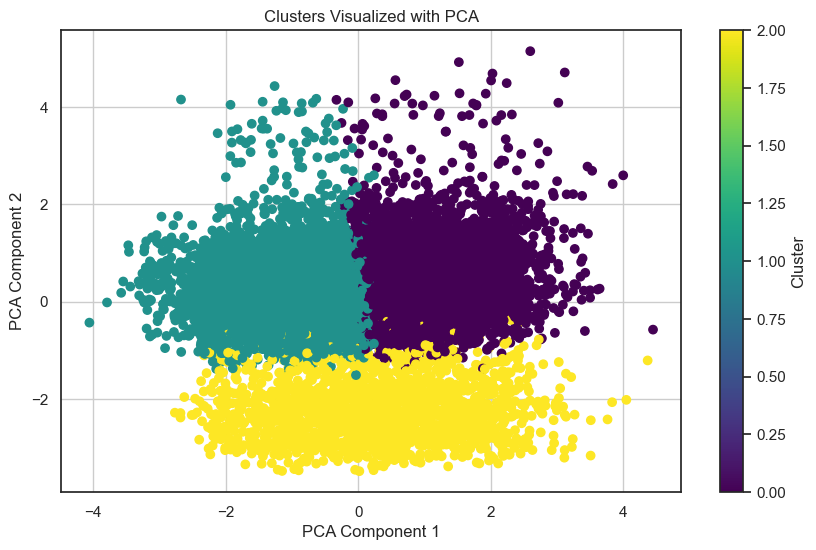

In [328]:
# Optionally: Visualize clusters using PCA for better understanding  
from sklearn.decomposition import PCA  

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(clustering_data_scaled)  

# Plotting the clusters  
plt.figure(figsize=(10, 6))  
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Cluster'], cmap='viridis', marker='o')  
plt.title('Clusters Visualized with PCA')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.colorbar(label='Cluster')  
plt.grid()  
plt.show()  

## Visualizing with PCA

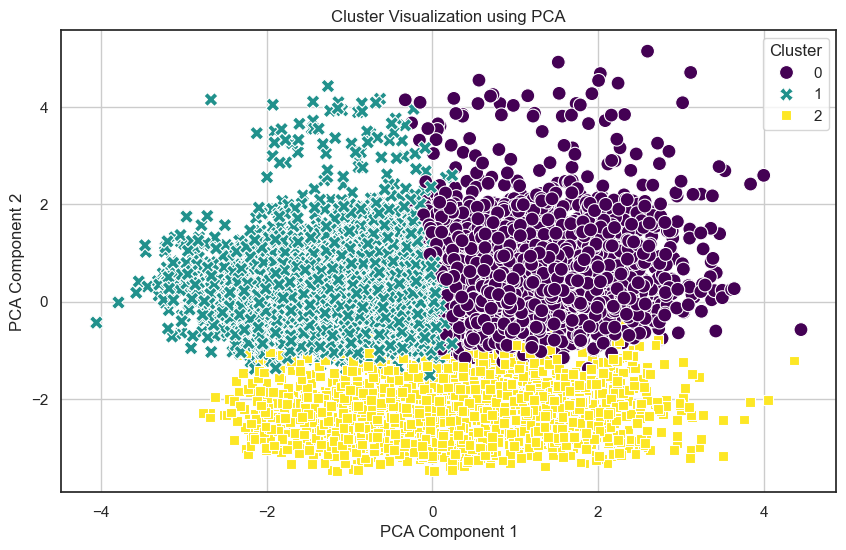

In [330]:

from sklearn.decomposition import PCA  

# Step 1: Apply PCA to the scaled data  
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(clustering_data_scaled)  

# Step 2: Create a DataFrame for PCA results and cluster labels  
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])  
pca_df['Cluster'] = data['Cluster']  

# Step 3: Plotting the clusters  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', style='Cluster', data=pca_df, palette='viridis', s=100)  
plt.title('Cluster Visualization using PCA')  
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.legend(title='Cluster')  
plt.grid()  
plt.show()

## Box Plots for Numerical Features

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\3328152765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=col, palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\3328152765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=col, palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\3328152765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Cluster', y=col, palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12876\33281527

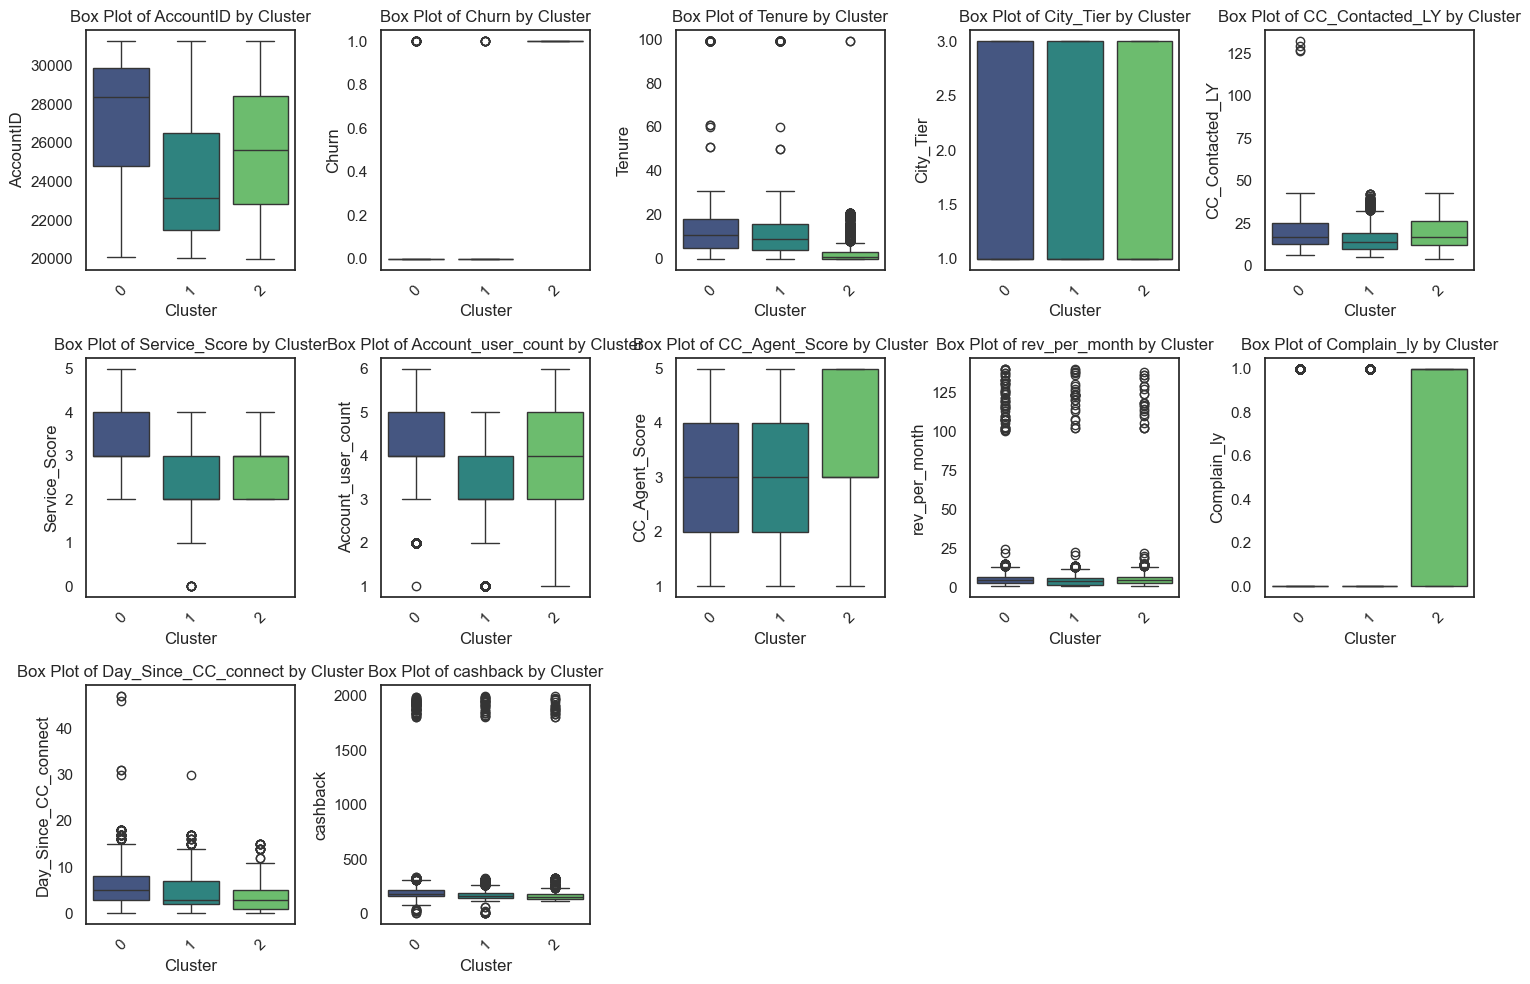

In [332]:
plt.figure(figsize=(15, 10))  
for i, col in enumerate(num_cols):  
    plt.subplot(3, len(num_cols) // 3 + 1, i + 1)  # Adjusting number of rows based on features  
    sns.boxplot(data=data, x='Cluster', y=col, palette='viridis')  
    plt.title(f'Box Plot of {col} by Cluster')  
    plt.xlabel('Cluster')  
    plt.ylabel(col)  
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility  

plt.tight_layout()  # Adjust layout to avoid overlap  

## Count Plots for Categorical Features

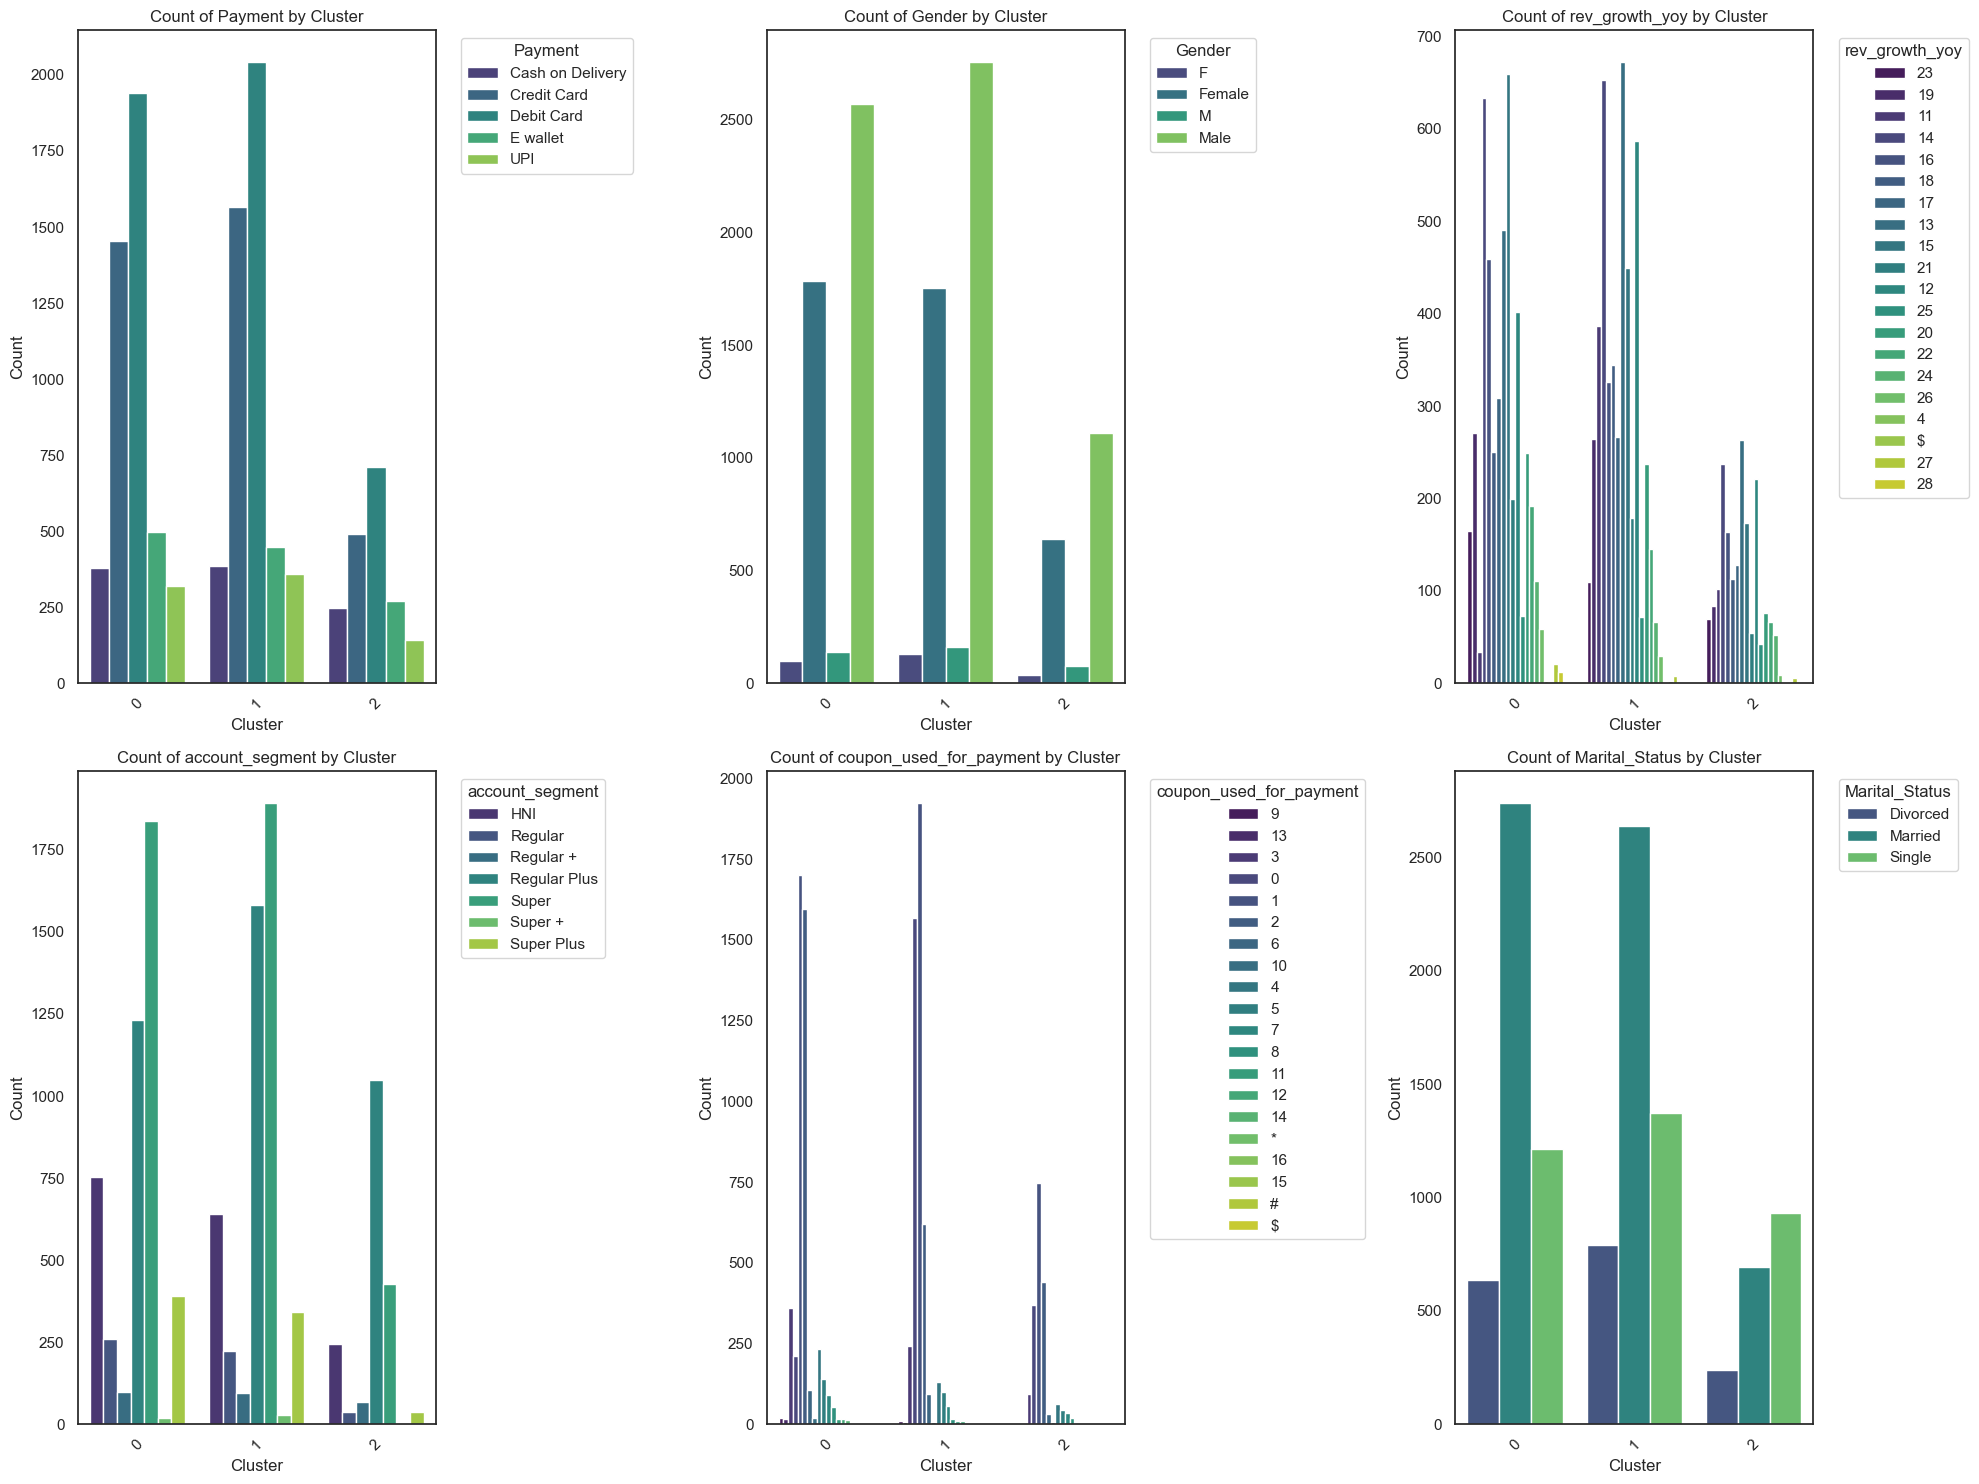

In [334]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Define your categorical features for visualization  
cat_cols = ['Payment', 'Gender', 'rev_growth_yoy', 'account_segment', 'coupon_used_for_payment', 'Marital_Status']  

# Set up the figure with a larger size  
plt.figure(figsize=(20, 15))  

# Loop through categorical features to create count plots  
for i, col in enumerate(cat_cols):  
    plt.subplot(2, 3, i + 1)  # Adjust the layout  
    sns.countplot(data=data, x='Cluster', hue=col, palette='viridis')  
    
    plt.title(f'Count of {col} by Cluster')  
    plt.xlabel('Cluster')  
    plt.ylabel('Count')  
    
    # Rotate x tick labels for better visibility  
    plt.xticks(rotation=45)  
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position  

plt.tight_layout()  # Adjust layout to avoid overlap  
plt.show()